In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TopHat as th
from PIL import Image

In [2]:
img_gray_test = np.array([
    [50, 80, 100, 80, 50],
    [80, 150, 200, 150, 80],
    [100, 200, 255, 200, 100],
    [80, 150, 200, 150, 80],
    [50, 80, 100, 80, 50],
], dtype=np.uint8)

- **Erosión morfológica** ($ E(X, A) $) se define como:
  $$
  E(X, A) = \min \{ x_{i-m, j-n} - a_{mn} \}
  $$
  Esto significa que para cada píxel $(i, j)$, tomamos la **vecindad** definida por el kernel $ A $, restamos los valores del kernel y seleccionamos el mínimo. Esto atenúa las estructuras brillantes y reduce su tamaño.


- **Dilatación morfológica** ($ D(X, A) $) se define como:
  $$
  D(X, A) = \max \{ x_{i-m, j-n} + a_{mn} \}
  $$
  Aquí, tomamos la **vecindad** y seleccionamos el máximo valor dentro de ella. Esto hace que las estructuras brillantes se expandan.


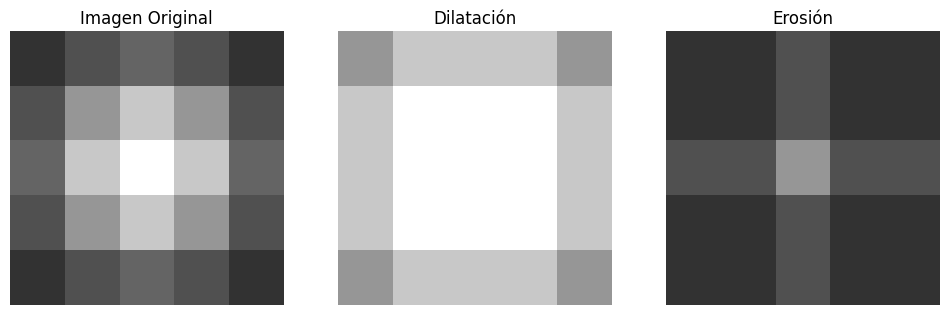

In [3]:
# Para kernel cuadrado
kernel_test = th.crea_kernel(3, 'cuadrado')

# Aplicar dilatación y erosión
dilated_img = th.dilatacion(img_gray_test, kernel_test)
eroded_img = th.erosion(img_gray_test, kernel_test)

th.ver_dilataion_erosion(img_gray_test, kernel_test)


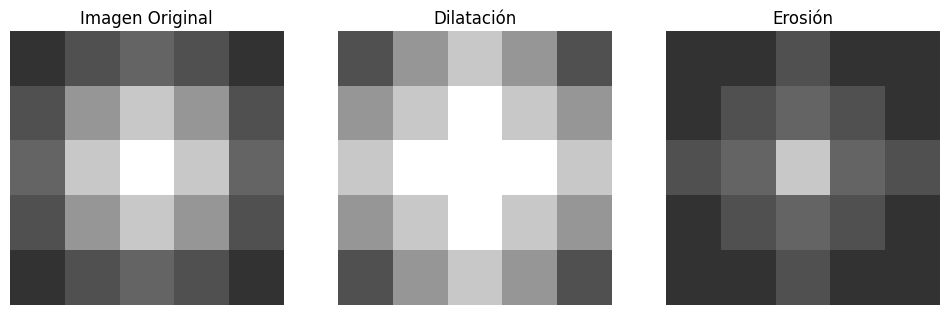

In [4]:
# Para kernel cuadrado
kernel_test = th.crea_kernel(3)

# Aplicar dilatación y erosión
dilated_img = th.dilatacion(img_gray_test, kernel_test)
eroded_img = th.erosion(img_gray_test, kernel_test)

th.ver_dilataion_erosion(img_gray_test, kernel_test)


Notemos que el resultado cambia de gran manera dependiendo del filtro.

Ahora veamos resultados para imagenes de retina.

In [5]:
ruta = 'drive/DRIVE/training/images/39_training.tif'
img = Image.open(ruta).convert("L")
img_array = np.array(img)

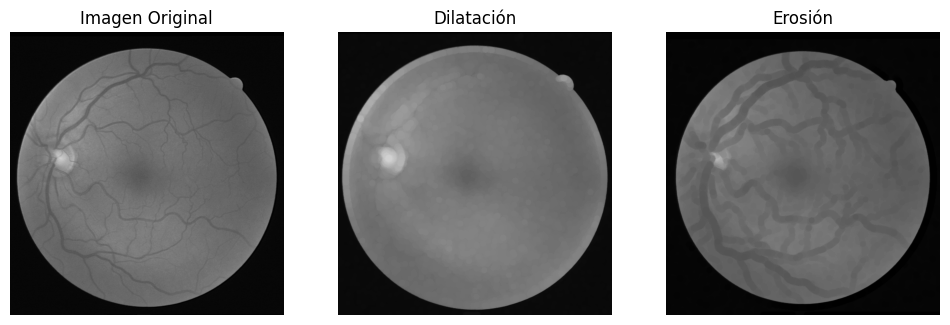

In [6]:
kernel_test = th.crea_kernel(13)
th.ver_dilataion_erosion(img_array, kernel_test)


**📌 Conexión con la Transformación Top-Hat**
Como el **Top-Hat** se define como:
$$
\text{Top-Hat}(X, A) = X - D(E(X, A), A)
$$
Esto significa que:
1. **Aplicamos erosión** → eliminamos estructuras brillantes pequeñas.
2. **Aplicamos dilatación** → restauramos la forma después de la erosión.
3. **Restamos de la imagen original** → resaltamos las estructuras brillantes eliminadas.

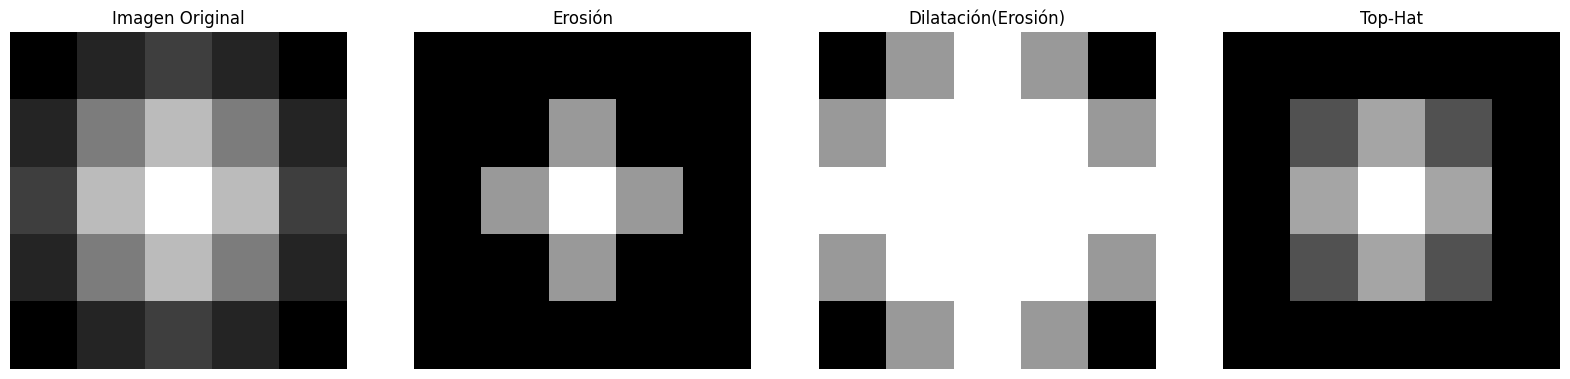

In [7]:
kernel1 = th.crea_kernel(5)
TopHat = th.TopHat(img_gray_test, kernel1)
erode = th.erosion(img_gray_test, kernel1)
opened = th.dilatacion(erode, kernel1)

th.vistas(img_gray_test, erode, opened, TopHat)

### 📌 Conexión con la Transformación Black-Hat  
Como el **Black-Hat** se define como:  
$$  
\text{Black-Hat}(X, A) = D(E(X, A), A) - X  
$$  
Esto significa que:  
1. **Aplicamos erosión** → eliminamos estructuras oscuras pequeñas.  
2. **Aplicamos dilatación** → restauramos la forma después de la erosión.  
3. **Restamos la imagen original** → resaltamos las estructuras oscuras eliminadas.

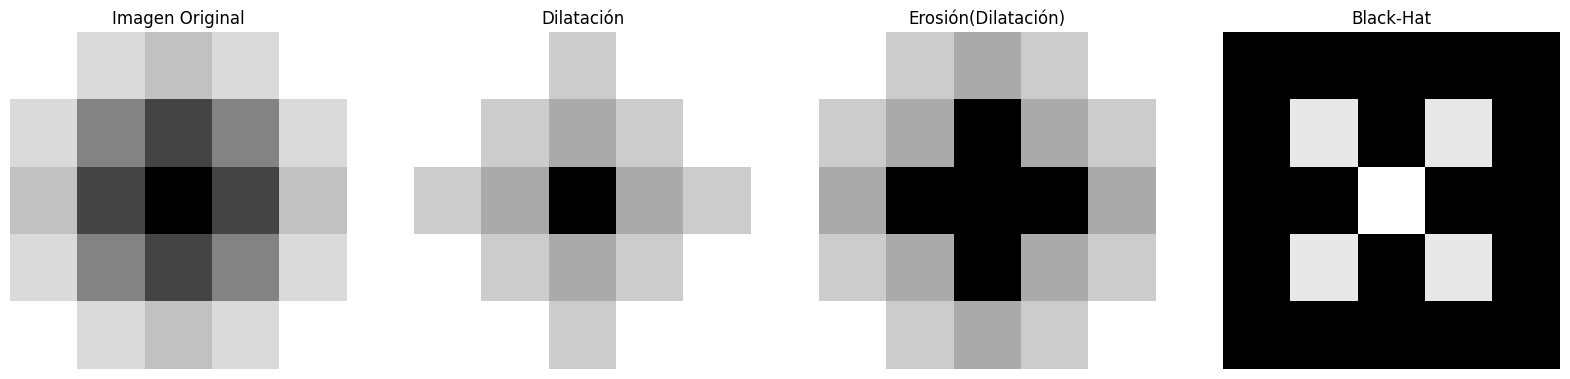

In [8]:
kernel1 = th.crea_kernel(3)
BlackHat = th.BlackHat(1-img_gray_test, kernel1)
dilataded = th.dilatacion(1-img_gray_test, kernel1)
closed = th.erosion(dilataded, kernel1)

names2 = ["Imagen Original", "Dilatación", "Erosión(Dilatación)", "Black-Hat"]
th.vistas(1-img_gray_test, dilataded, closed, BlackHat, names2)

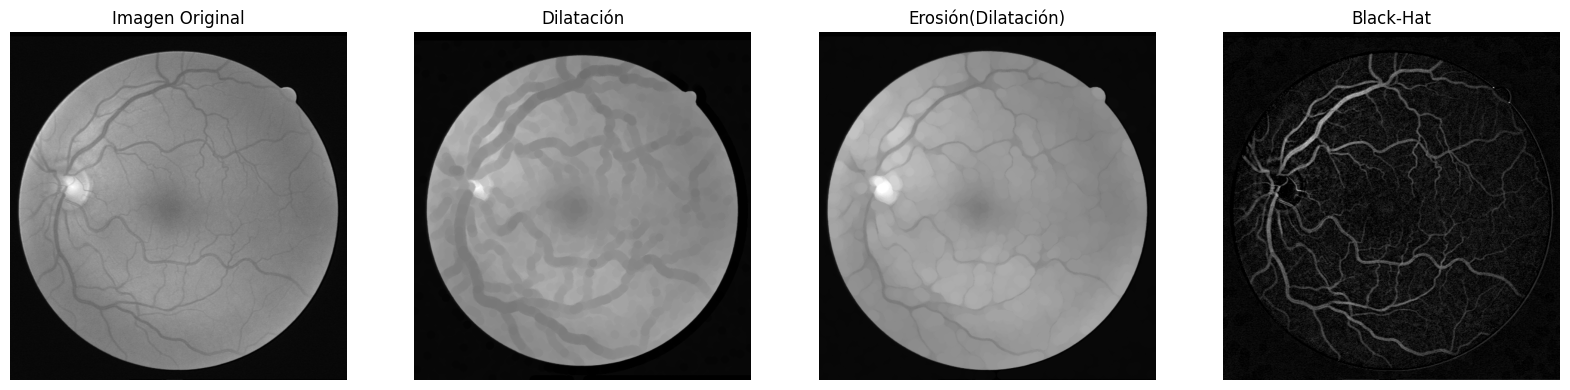

In [9]:
kernel1 = th.crea_kernel(15)
TopHat = th.BlackHat(img_array, kernel1)
erode = th.erosion(img_array, kernel1)
opened = th.dilatacion(erode, kernel1)

th.vistas(img_array, erode, opened, TopHat, names2)

Zoom de una zona de la imagen

(-0.5, 99.5, 99.5, -0.5)

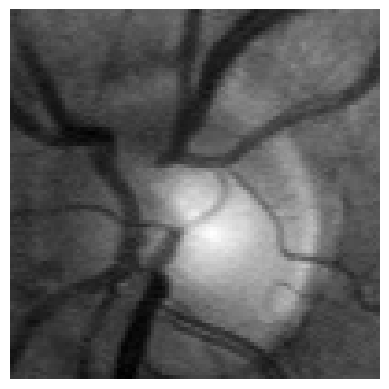

In [10]:
im_zoom = img_array[200:300, 50:150]

plt.imshow(im_zoom, cmap='gray')
plt.axis('off')

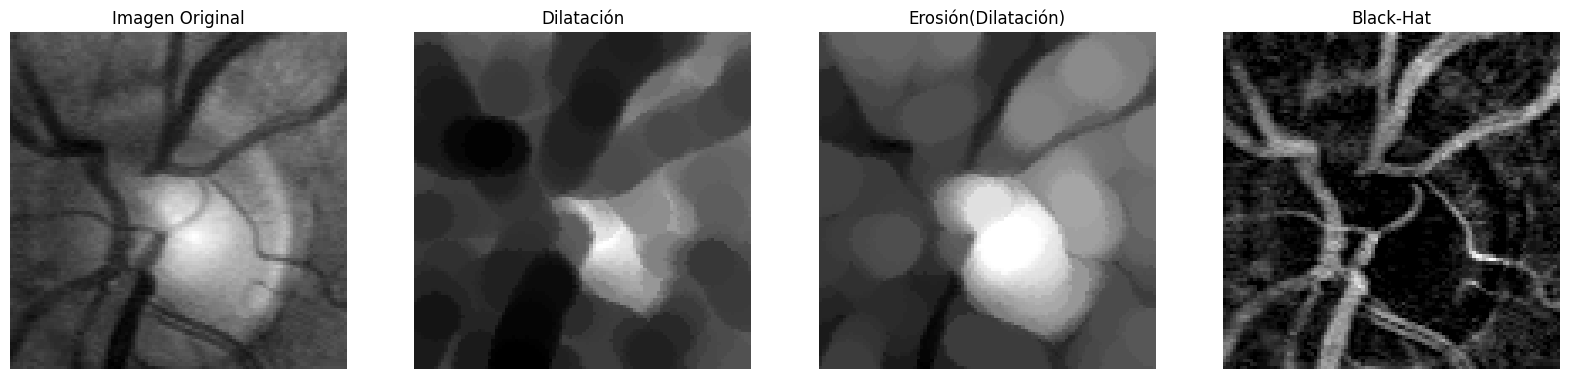

In [11]:
kernel1 = th.crea_kernel(15)
TopHat = th.BlackHat(im_zoom, kernel1)
erode = th.erosion(im_zoom, kernel1)
opened = th.dilatacion(erode, kernel1)

th.vistas(im_zoom, erode, opened, TopHat, names2)